[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



Categorical: gender
quantitative: number of kids
discrete: age
continuous: temperature

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

In [ ]:
#carbon_west.head()

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2


In [ ]:
#carbon_west.shape

(35, 2)

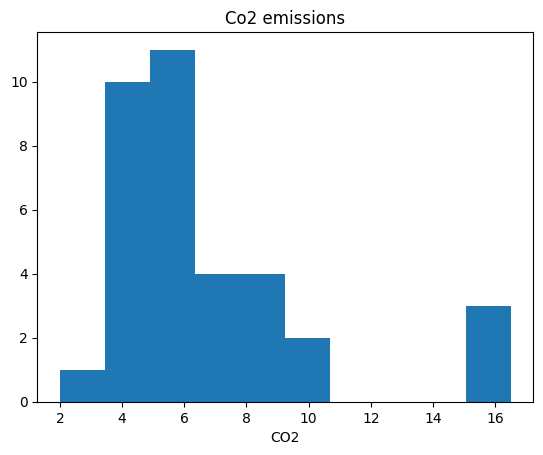

In [ ]:
plt.hist(carbon_west['CO2'], bins=10)
plt.xlabel('CO2')
plt.title('Co2 emissions')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [ ]:
summary = carbon_west.describe()
print(f"The mean is {summary.loc['mean']['CO2']}")
print(f"The median is {summary.loc['50%']['CO2']}")
print(f"The standard deviation is {summary.loc['std']['CO2']}")

The mean is 6.717142857142858
The median is 5.9
The standard deviation is 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [ ]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [ ]:
murders_no_dc = murders[murders['state'] != 'DC']
summaryNoDC = murders_no_dc.describe()
print(f"The mean is {summaryNoDC.loc['mean']['murder']}")
print(f"The standard deviation is {summaryNoDC.loc['std']['murder']}")

The mean is 4.874
The standard deviation is 2.586291174793806


Part b. Find the five-number  summary without D.C.

In [ ]:
print(f"The min is {summaryNoDC.loc['min']['murder']}")
print(f"The first quartile is {summaryNoDC.loc['25%']['murder']}")
print(f"The median is {summaryNoDC.loc['50%']['murder']}")
print(f"The third quartile is {summaryNoDC.loc['75%']['murder']}")
print(f"The max is {summaryNoDC.loc['max']['murder']}")

The min is 1.0
The first quartile is 2.625
The median is 4.85
The third quartile is 6.175
The max is 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [ ]:
summaryDC = murders.describe()
print(f"The mean is {summaryDC.loc['mean']['murder']}")
print(f"The median is {summaryDC.loc['50%']['murder']}\n")

print(f"This is the five number summary")
print(f"The min is {summaryDC.loc['min']['murder']}")
print(f"The first quartile is {summaryDC.loc['25%']['murder']}")
print(f"The median is {summaryDC.loc['50%']['murder']}")
print(f"The third quartile is {summaryDC.loc['75%']['murder']}")
print(f"The max is {summaryDC.loc['max']['murder']}")

The mean is 5.252941176470588
The median is 5.0

This is the five number summary
The min is 1.0
The first quartile is 2.6500000000000004
The median is 5.0
The third quartile is 6.45
The max is 24.2


The mean was effected more by the outlier. The range was effected more that the IQR

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [ ]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

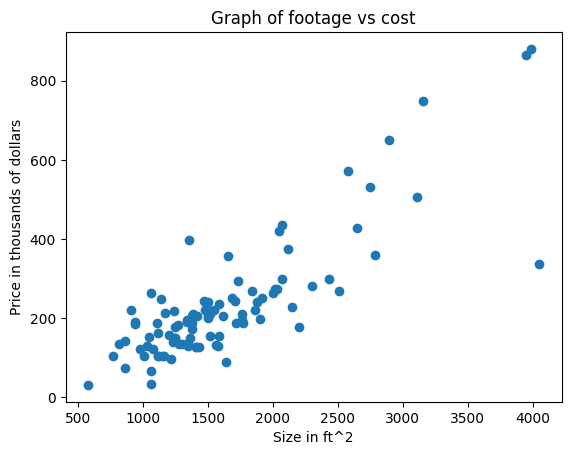

In [ ]:
plt.scatter(houses['size'], houses['price'])
plt.xlabel('Size in ft^2')
plt.ylabel('Price in thousands of dollars')
plt.title('Graph of footage vs cost')
plt.show()

Part b. Find the correlation between the two variables.

In [ ]:
corr = houses['size'].corr(houses['price'])
print(f"The correlation is {corr}")

The correlation is 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

Text(0, 0.5, 'Price in thousands of dollars')

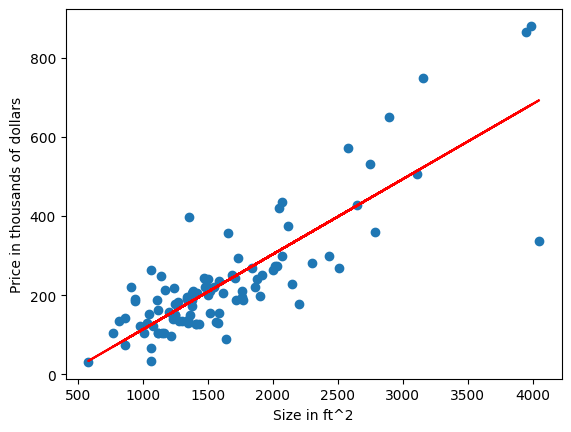

In [ ]:
x = houses[['size']]
y = houses['price']
model = LinearRegression()
model.fit(x,y)


plt.scatter(x,y)
plt.plot(x, model.predict(x), color='red')
plt.xlabel('Size in ft^2')
plt.ylabel('Price in thousands of dollars')

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

Text(0, 0.5, 'Price in thousands of dollars')

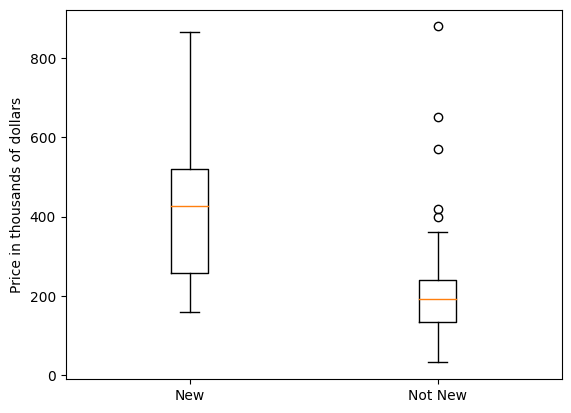

In [ ]:
plt.boxplot([houses[houses['new'] == 1]['price'], houses[houses['new'] == 0]['price']], labels=['New', 'Not New'])
plt.ylabel('Price in thousands of dollars')

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a strong positive correlation between size of home and its cost. This can be seen easily in the scatter plot. Whether or not the house is new also influences the cost. Not new homes see a sharp decrease in median cost as well as having a significally reduces spread. There are some outliers amoung old homes, which may be the result of exceptionally fancy homes that retain value even after being used.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [ ]:
#happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep = "\\s+")

In [ ]:
happy.head()
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
